<a href="https://colab.research.google.com/github/zaynoub/Analysis-of-Bank-Debit-Collections/blob/main/2year_data_preprocessing%2Bexploration%2Bvisulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing libraries
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing the data
from google.colab import files
uploaded=files.upload()
df = pd.read_csv('2year.csv', na_values=['?'])

Saving 2year.csv to 2year.csv


In [4]:
#importing the csv file with the attribute names
upload=files.upload()
atrributes=pd.read_csv('AtrributeNames.csv')

Saving AtrributeNames.csv to AtrributeNames (2).csv


Data labeling

In [5]:
#Labeling the dataset
atrribute_names = atrributes['Column Names'].tolist()
df.columns = [df.columns[0]] + atrribute_names[0:65] + [df.columns[-1]]

Data preprocessing

In [6]:
#handling duplicated rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,id,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class


In [7]:
#detecting missing values in each column
df.isnull().sum()

id                                           0
net profit / total assets                    1
total liabilities / total assets             1
working capital / total assets               1
current assets / short-term liabilities     22
                                          ... 
sales / receivables                         16
(short-term liabilities *365) / sales       63
sales / short-term liabilities              22
sales / fixed assets                       212
class                                        0
Length: 66, dtype: int64

In [8]:
#detecting missing values in the whole Dataset
df.isnull().sum().sum()

12157

In [9]:
#handling missing values
imputer = SimpleImputer(strategy='mean')
imputer.fit(df)
df2 = imputer.transform(df)
df2 = pd.DataFrame(df2, columns=df.columns)
(df2.isnull().sum().sum())

0

Data Exploration

In [10]:
df2.head()

,id,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
0,1.0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,...,0.13184,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440,0.0
1,2.0,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,...,0.12146,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381,0.0
2,3.0,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,...,0.16499,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660,0.0
3,4.0,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,...,0.29358,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066,0.0
4,5.0,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,...,0.10124,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874,0.0


In [11]:
df2.describe()

,id,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
count,10173.000000,10173.000000,10173.00000,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,...,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,1.017300e+04,10173.000000,10173.000000,10173.000000
mean,5087.000000,0.043074,0.64696,0.070861,4.144058,-144.830797,-0.111564,0.122101,9.868798,2.867541,...,-1.128949,-0.043519,12.656337,3.034738,375.332514,16.884020,8.910799e+02,11.217653,55.275877,0.039320
std,2936.836478,1.111974,6.61508,6.606170,51.659287,7802.754959,6.567765,6.532168,288.131598,96.655585,...,86.234627,12.250446,631.722877,238.162238,11961.669218,295.529611,4.352592e+04,233.666115,1510.596355,0.194364
min,1.000000,-75.331000,0.00000,-479.960000,0.002079,-438250.000000,-508.410000,-75.331000,-1.594500,-0.612590,...,-8534.600000,-979.250000,-4.549700,-189.580000,0.000000,-0.007521,-9.921400e+02,-0.367890,-10677.000000,0.000000
25%,2544.000000,0.000368,0.27771,0.012133,1.030100,-50.783000,0.000000,0.001985,0.393950,1.026300,...,0.009550,0.009951,0.872580,0.000000,5.907300,4.698600,4.043400e+01,3.105600,2.342400,0.000000
50%,5087.000000,0.049464,0.48734,0.189660,1.527400,-2.116600,0.000000,0.060060,1.007500,1.285900,...,0.054562,0.126160,0.950280,0.004866,11.032000,6.997200,7.015800e+01,5.212600,4.657300,0.000000
75%,7630.000000,0.141100,0.70503,0.400350,2.758600,51.243000,0.074718,0.165850,2.539700,2.259300,...,0.133340,0.309130,0.993810,0.249410,27.108000,11.112000,1.177200e+02,9.039500,11.359000,0.000000
max,10173.000000,7.372700,480.96000,5.502200,4881.600000,70686.000000,35.551000,649.230000,18554.000000,9742.300000,...,20.200000,147.190000,59672.000000,23853.000000,639940.000000,26862.000000,4.144800e+06,23454.000000,127680.000000,1.000000


In [12]:
df2.dtypes

id                                         float64
net profit / total assets                  float64
total liabilities / total assets           float64
working capital / total assets             float64
current assets / short-term liabilities    float64
                                            ...   
sales / receivables                        float64
(short-term liabilities *365) / sales      float64
sales / short-term liabilities             float64
sales / fixed assets                       float64
class                                      float64
Length: 66, dtype: object

In [13]:
df2.shape

(10173, 66)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 66 columns):
 #   Column                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                             --------------  -----  
 0   id                                                                                                                 10173 non-null  float64
 1   net profit / total assets                                                                                          10173 non-null  float64
 2   total liabilities / total assets                                                                                   10173 non-null  float64
 3   working capital / total assets                                                                                     10173 non-null  float64
 4   current assets / short

In [15]:
df2.corr()

,id,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
id,1.000000,-0.003330,0.014496,-0.016695,0.001779,-0.013444,-0.014853,0.001644,-0.008817,0.003962,...,-0.006472,0.008759,-0.021376,-0.013787,0.008657,0.015578,0.011920,0.005570,0.008824,0.336632
net profit / total assets,-0.003330,1.000000,-0.429079,0.428541,0.002655,0.230800,0.332117,0.174900,0.000688,-0.009055,...,0.000848,0.028875,-0.023857,-0.000583,0.003978,0.002058,-0.001071,0.007756,-0.022996,-0.011964
total liabilities / total assets,0.014496,-0.429079,1.000000,-0.998605,-0.005199,-0.426148,-0.981243,-0.073439,-0.003174,0.005915,...,-0.000764,-0.000749,0.001364,0.000614,-0.000850,0.000851,0.195100,-0.002189,-0.000139,0.038157
working capital / total assets,-0.016695,0.428541,-0.998605,1.000000,0.006086,0.427275,0.979942,0.073576,0.001938,-0.005595,...,0.000319,0.000736,-0.000677,-0.000091,0.000886,-0.001710,-0.195434,0.002438,0.000332,-0.038354
current assets / short-term liabilities,0.001779,0.002655,-0.005199,0.006086,1.000000,0.024904,0.001463,0.000066,0.200137,-0.000906,...,0.000221,0.000808,0.000286,-0.000717,0.000306,-0.000694,-0.000918,0.015307,-0.000258,-0.001861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sales / receivables,0.015578,0.002058,0.000851,-0.001710,-0.000694,-0.001303,-0.002627,0.405983,-0.000848,0.412768,...,0.000792,0.001155,-0.001060,-0.000503,0.216225,1.000000,-0.001066,0.411169,0.189939,-0.001200
(short-term liabilities *365) / sales,0.011920,-0.001071,0.195100,-0.195434,-0.000918,-0.060352,-0.204347,-0.000436,-0.000026,-0.000562,...,-0.210122,-0.000028,0.028674,-0.000131,-0.000160,-0.001066,1.000000,-0.000946,-0.000598,0.009093
sales / short-term liabilities,0.005570,0.007756,-0.002189,0.002438,0.015307,0.000953,0.000453,0.980812,0.003098,0.994193,...,0.000682,0.001405,-0.000881,-0.000432,0.522228,0.411169,-0.000946,1.000000,0.459351,-0.002525
sales / fixed assets,0.008824,-0.022996,-0.000139,0.000332,-0.000258,0.000410,0.044302,0.450455,-0.000724,0.470643,...,0.000508,0.000918,-0.000202,-0.000461,0.241718,0.189939,-0.000598,0.459351,1.000000,0.039316


Data Visualization and Manipulation.

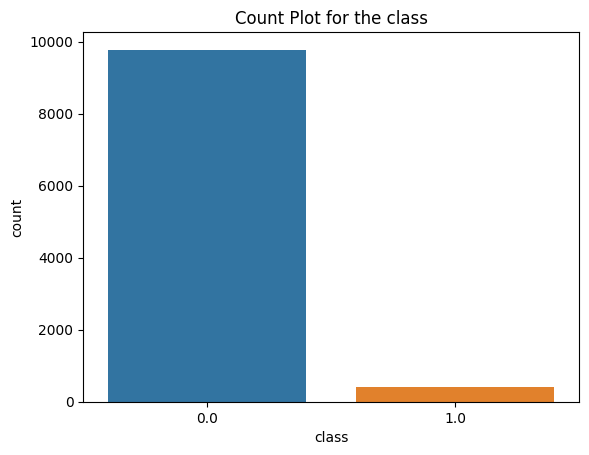

In [16]:
sns.countplot(x='class', data=df2)
plt.title('Count Plot for the class')
plt.show()

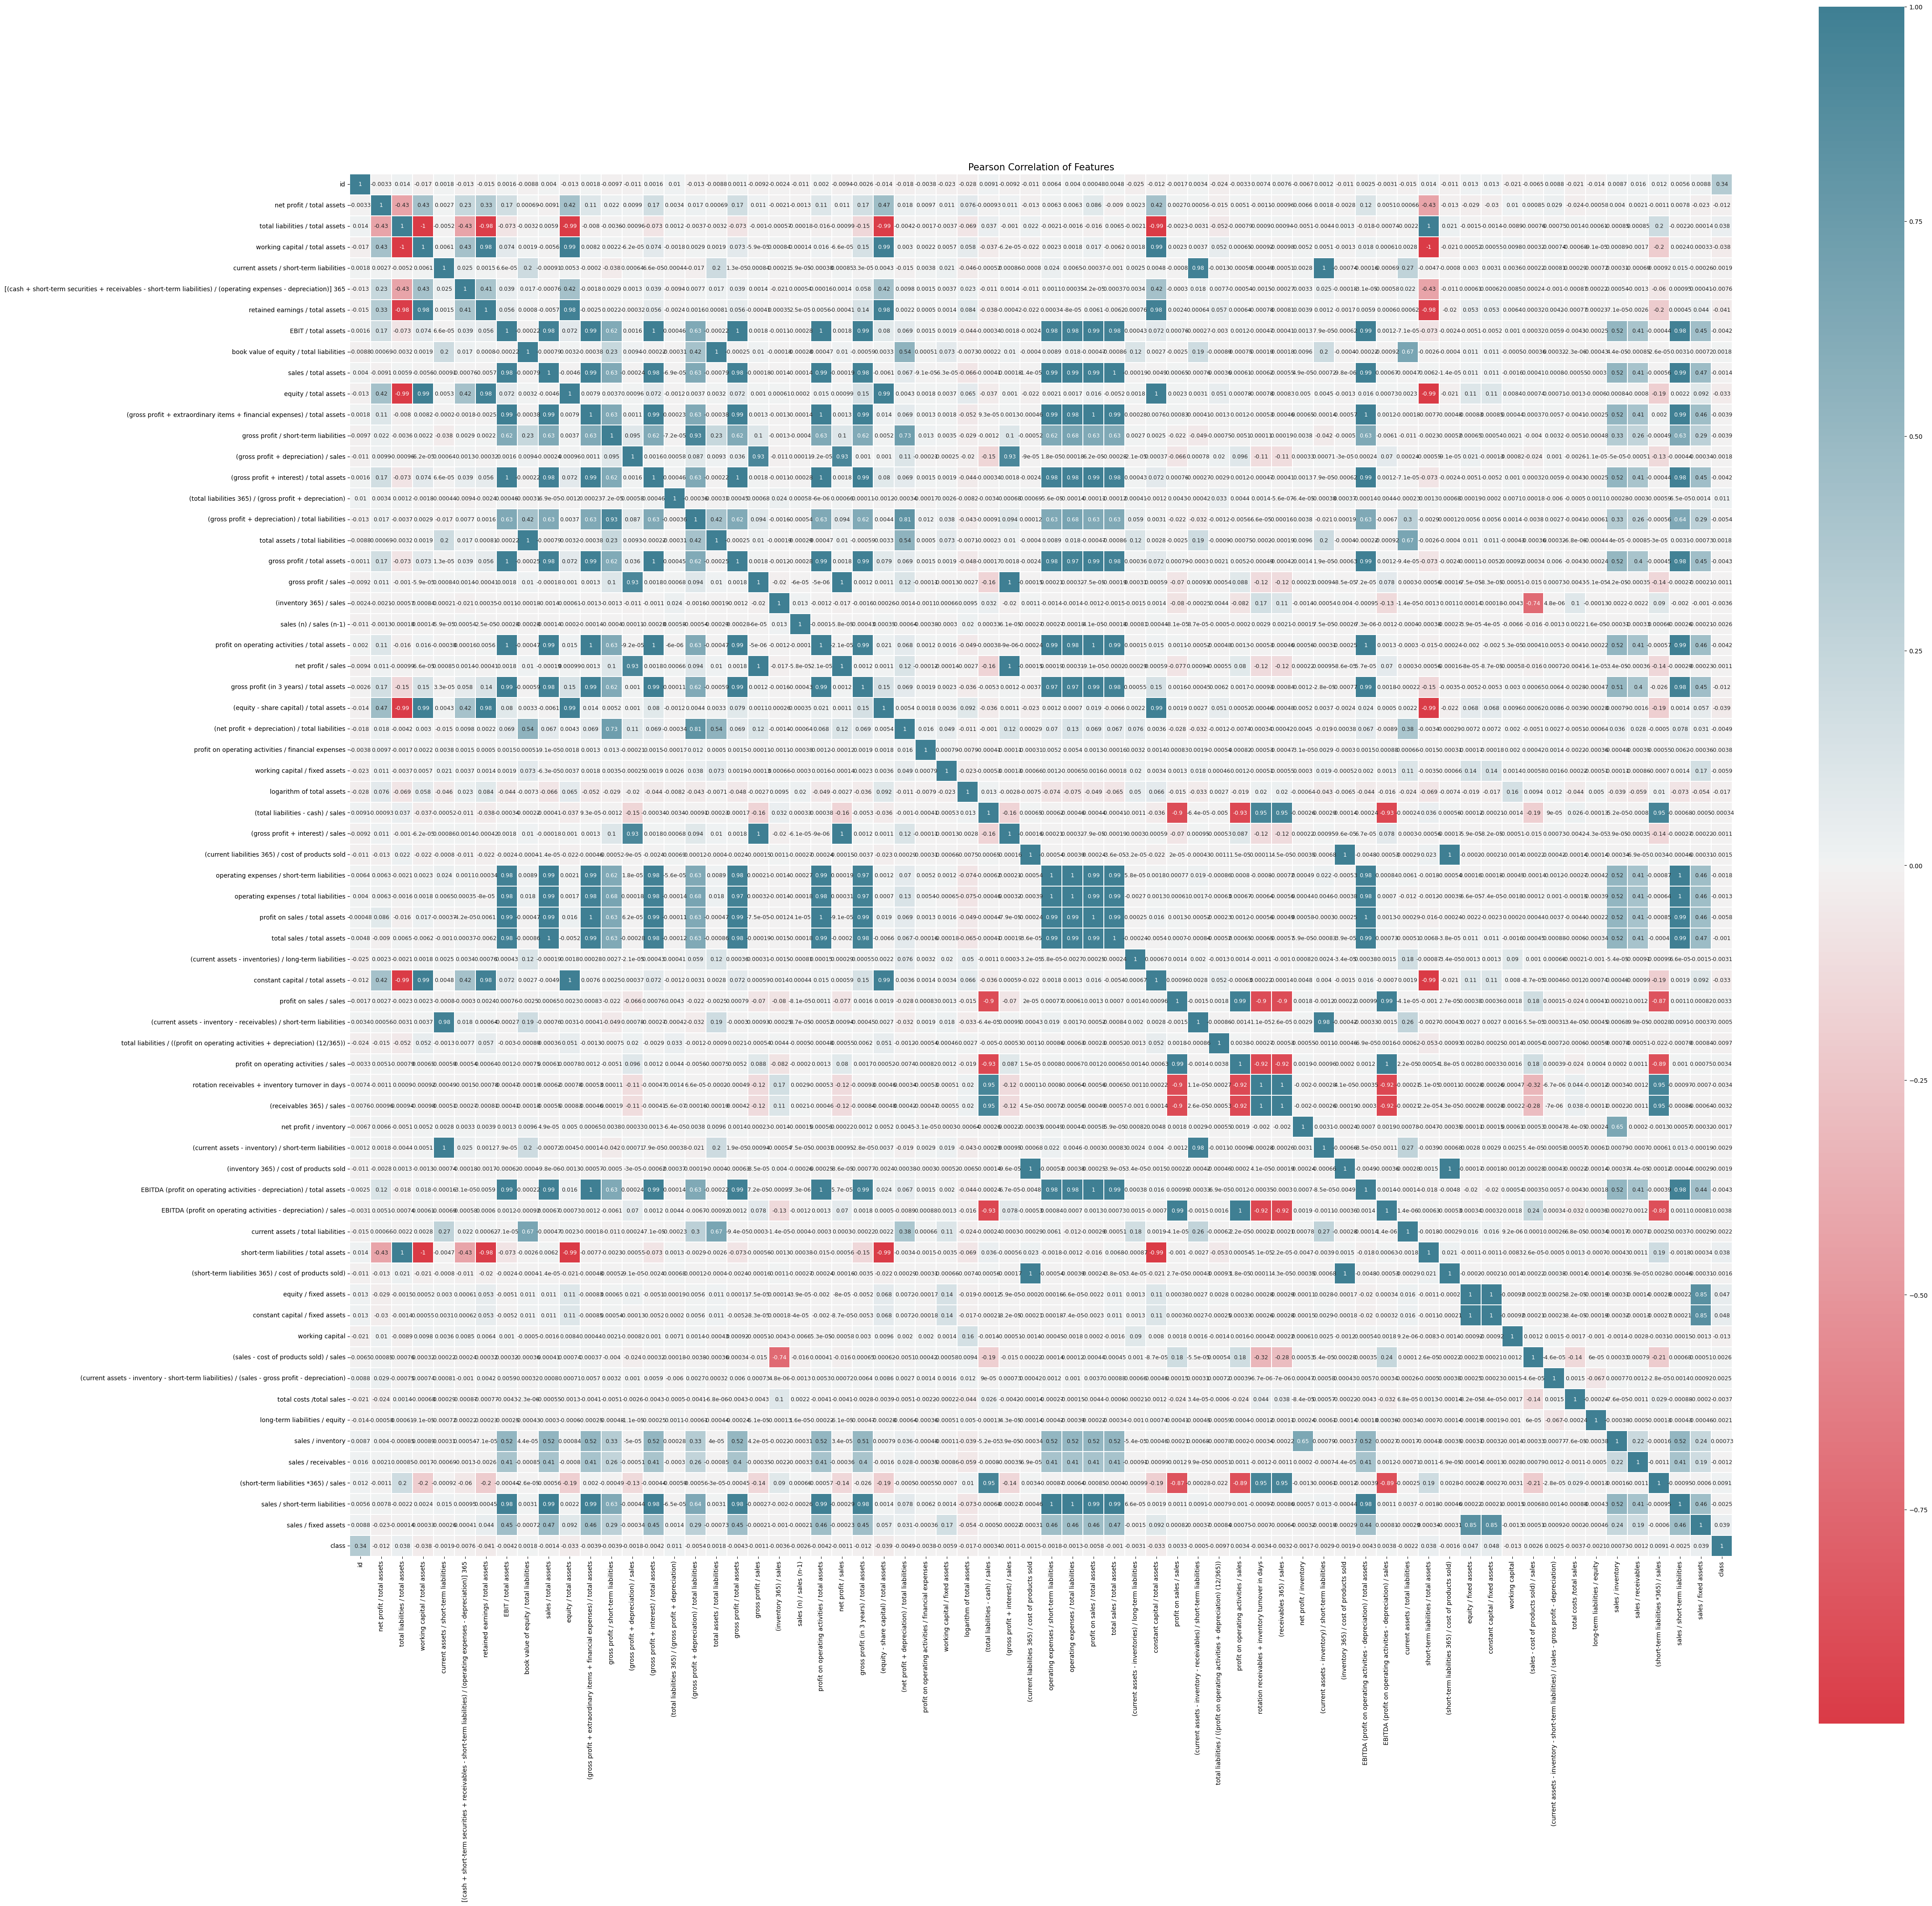

In [17]:
plt.figure(figsize=(50,50))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(df2.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':9 })
plt.show()

In [ ]:
sns.pairplot(df2, height=2.5)
plt.show()